Import all libraries and load in the numpy arrays

In [1]:
import pickle
import time
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import normalize, to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.optimizers import Adam
X_train= pickle.load(open("C:/Users/moham/Desktop/MyDeepLearningProject/Datasets/benVCan/X_train.pickle","rb"))
y_train = pickle.load(open("C:/Users/moham/Desktop/MyDeepLearningProject/Datasets/benVCan/y_train.pickle","rb"))

Normalize data

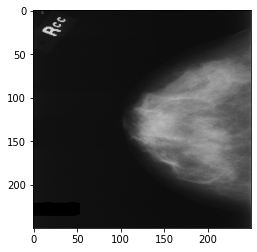

In [2]:
plt.imshow(X_train[0])
plt.show()

In [3]:
# classes=["Benign","Cancer","Normal"]
# classes=["BenignOrCanc","Normal"]
classes=["Benign","Cancer"]
y_train = to_categorical(y_train)

In [4]:
# width_shift_range=0.2,
# rotation_range=20,
# height_shift_range=0.2,
# horizontal_flip=True,
# brightness_range=[0.6,0.8],
# validation_split=0.2,
# fill_mode='reflect',
# zoom_range=[0.9,1.1],
#     preprocessing_function=preprocess_input
datagen = ImageDataGenerator(
    rescale=1/255.,
    width_shift_range=0.1,
    rotation_range=20,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2,
    shear_range=0.8,
    brightness_range=[1.2,1.5],
    fill_mode='reflect',
    cval=0.0,
    preprocessing_function=preprocess_input,

)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
c:\users\moham\desktop\mydeeplearningproject\lib\site-packages\matplotlib\text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


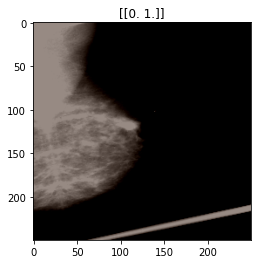

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


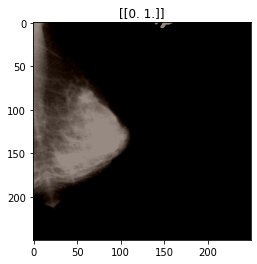

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


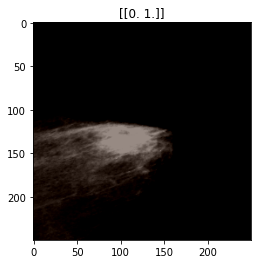

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


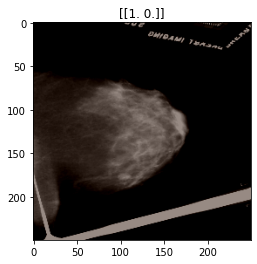

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


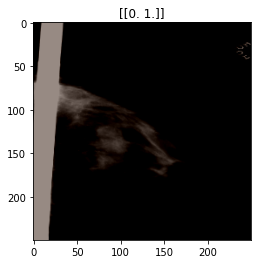

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


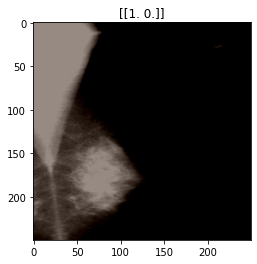

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


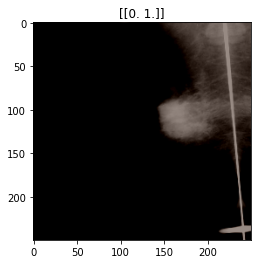

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


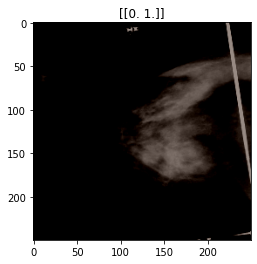

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


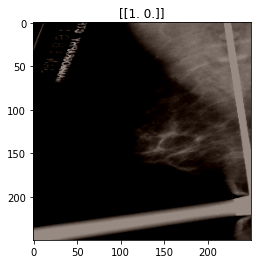

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


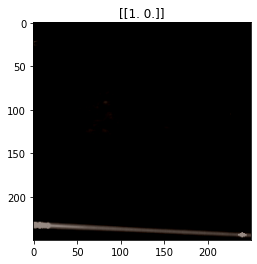

In [5]:
i = 0
for xbatch,ybatch in datagen.flow(X_train,y_train, batch_size=1):
    plt.imshow(xbatch[0])
    plt.title(ybatch)
    plt.show()
    i+=1
    if i ==10:
        break

In [22]:
model= VGG16()
print(model.summary())

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [6]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dropout
# load model without classifier layers
model = VGG16(include_top=False, input_shape=X_train.shape[1:],weights="imagenet")
# add new classifier layers
model.trainable=False
flat1 = Flatten()(model.layers[-1].output)
dense1 = Dense(128, activation='relu')(flat1)
drop = Dropout(0.25)(dense1)
dense2 = Dense(64,activation='relu')(drop)
drop2 = Dropout(0.25)(dense2)
output = Dense(2, activation='softmax')(drop2)
# define new model
model = Model(inputs=model.inputs, outputs=output)
# summarize
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 250, 250, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 250, 250, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 250, 250, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 125, 125, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 125, 125, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 125, 125, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 62, 62, 128)       0     

In [7]:
model.compile(loss="categorical_crossentropy",
             optimizer=Adam(learning_rate=0.0001),
             metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 250, 250, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 250, 250, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 250, 250, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 125, 125, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 125, 125, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 125, 125, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 62, 62, 128)       0     

In [8]:
NAME = "VGG16-BenOrCan-datagen-128-64-{}".format(int(time.time()))
EarlyStop=EarlyStopping(patience=10,monitor='val_loss')
checkpoints=ModelCheckpoint(filepath=f'ModelCheckPoints/{NAME}.h5', verbose=1, save_best_only=True)
tensorboard = TensorBoard(log_dir='DeepModels/{}'.format(NAME))
callbacks=[EarlyStop,checkpoints,tensorboard]
history=model.fit(datagen.flow(X_train, y_train, batch_size=16,
         subset='training'),
         validation_data=datagen.flow(X_train, y_train,
         batch_size=16, subset='validation'),
         steps_per_epoch=len(X_train)/29 , epochs=50,callbacks=[callbacks])

Epoch 1/50
77/77 [==============================] - 30s 303ms/step - loss: 0.7405 - accuracy: 0.4769 - val_loss: 0.6912 - val_accuracy: 0.5312

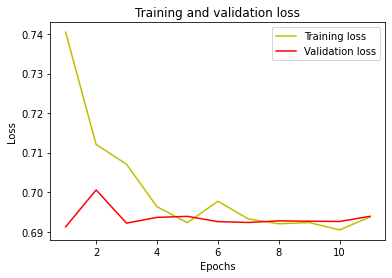

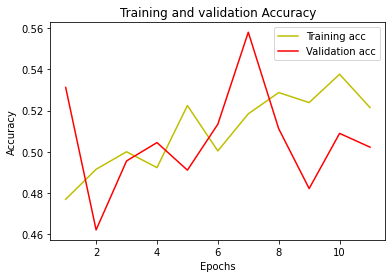

In [28]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs,loss,'y', label = "Training loss")
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title("Training and validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs,acc,'y', label = "Training acc")
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title("Training and validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [48]:
from tensorflow.keras.models import load_model
model =load_model('C:/Users/moham/Desktop/MyDeepLearningProject/transferLearning/ModelCheckPoints/VGG16-test-1-datagen-1633886654.h5')

In [49]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [21]:
CAT=['Benign','Cancer']
X_test= pickle.load(open("C:/Users/moham/Desktop/MyDeepLearningProject/Datasets/benVCan/X_test.pickle","rb"))
y_test = pickle.load(open("C:/Users/moham/Desktop/MyDeepLearningProject/Datasets/benVCan/y_test.pickle","rb"))
from tensorflow.keras.utils import to_categorical
X_test=X_test/255.0
y_test = to_categorical(y_test,num_classes=2)
print(len(X_test))

561


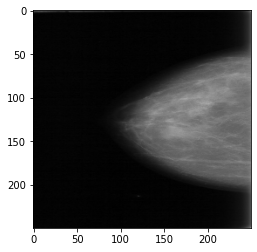

Actual label: Benign
Predicted label: Cancer


In [22]:
# CAT=['Benign','Cancer','Normal']
# CAT=['BenignOrCancer','Normal']
CAT=['Benign','Cancer']

import matplotlib.pyplot as plt
import numpy as np
myImageArray = X_test[25:26]
plt.imshow(myImageArray[0])
plt.show()
myLabel = y_test[25:26]
print("Actual label: "+CAT[np.argmax(myLabel[0])])

preds = model.predict(X_test[25:26].astype('uint16'))
preds = np.argmax(preds[0])
print("Predicted label: "+CAT[preds])

In [23]:
# CAT=['Benign','Cancer','Normal']
# CAT=['BenignOrCancer','Normal']
CAT=['Benign','Cancer']
preds = model.predict(X_test)
preds=np.argmax(preds, axis=-1)

In [24]:
y_test_rounded=np.argmax(y_test, axis=1)

In [25]:
import itertools
import numpy as np
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true=y_test_rounded, y_pred=preds)

def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
	plt.imshow(cm, interpolation='nearest', cmap=cmap)
	plt.title(title)
	plt.colorbar()
	tick_marks = np.arange(len(classes))
	plt.xticks(tick_marks,classes, rotation=45)
	plt.yticks(tick_marks,classes)

	if normalize:
		cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
		print("Normalized Confusion matrix")
	else:
		print("Confusion matrix, without normalization")

	print(cm)

	thresh = cm.max()/ 2.
	for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
		plt.text(j,i,cm[i,j],
				 horizontalalignment="center",
				 color="white" if cm[i,j] > thresh else "black")

	plt.tight_layout()
	plt.ylabel('true label')
	plt.xlabel('predicted label')

Confusion matrix, without normalization
[[212  68]
 [208  73]]


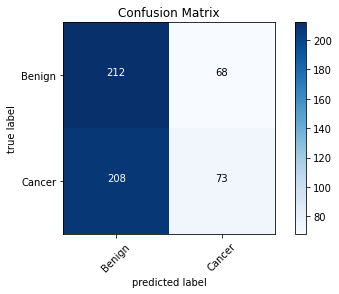

In [26]:
cm_plot_labels = CAT
plot_confusion_matrix(cm=cm,classes=cm_plot_labels, title='Confusion Matrix')

In [27]:
score = model.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

18/18 [==============================] - 2s 128ms/step - loss: 0.6915 - accuracy: 0.5080

In [29]:
from tensorflow.keras import metrics

print(y_test.classes)
x_pred=model.predict(X_test, verbose=0)

np.round(x_pred)
y_pred=np.argmax(x_pred, axis=1)
cm=confusion_matrix(y_true=y_test.classes, y_pred=y_pred)
print (y_test.class_indices)
print (cm)
print(metrics.classification_report(y_test.classes, y_pred, digits=3))
cm_plot_labels=['Benign','Cancer']
plot_confusion_matrix(cm, cm_plot_labels,title='Confusion matrix')

AttributeError: 'numpy.ndarray' object has no attribute 'classes'